In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
path = '../Wimbledon_featured_matches.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            7284 non-null   object 
 1   player1             7284 non-null   object 
 2   player2             7284 non-null   object 
 3   elapsed_time        7284 non-null   object 
 4   set_no              7284 non-null   int64  
 5   game_no             7284 non-null   int64  
 6   point_no            7284 non-null   int64  
 7   p1_sets             7284 non-null   int64  
 8   p2_sets             7284 non-null   int64  
 9   p1_games            7284 non-null   int64  
 10  p2_games            7284 non-null   int64  
 11  p1_score            7284 non-null   object 
 12  p2_score            7284 non-null   object 
 13  server              7284 non-null   int64  
 14  serve_no            7284 non-null   int64  
 15  point_victor        7284 non-null   int64  
 16  p1_poi

In [3]:
"""
    match_id: 比赛编号
    set_no: 局数
    point_no: 得分点编号
    point_victor: 当前得分点的得分人
    server：当前发球人
"""
data = df[['match_id', 'set_no', 'point_no', 'point_victor', 'server']]
target_match_id = '2023-wimbledon-1701'
data = data[data['match_id'] == target_match_id]

data['momentum_score_1'] = 0
data['momentum_score_2'] = 0

momentum_score_1 = 0
momentum_score_2 = 0
consecutive_wins_1 = 0
consecutive_wins_2 = 0

In [6]:
for index, row in data.iterrows():
    """
    球员1
    """
    P_t = 1 if row['point_victor'] == 1 else 0
    S_t = 1.2 if row['server'] == 1 else 1.0
    if P_t == 1:
        consecutive_wins_1 += 1
    else:
        consecutive_wins_1 = 0
    C_t = 1 + consecutive_wins_1 * 0.2
    momentum_score_1 += (P_t * S_t * C_t)
    data.at[index, 'momentum_score_1'] = momentum_score_1

    """
    球员2
    """
    P_t = 1 if row['point_victor'] == 2 else 0
    S_t = 1.2 if row['server'] == 2 else 1.0
    if P_t == 1:
        consecutive_wins_2 += 1
    else:
        consecutive_wins_2 = 0
    C_t = 1 + consecutive_wins_2 * 0.2
    momentum_score_2 += (P_t * S_t * C_t)
    data.at[index, 'momentum_score_2'] = momentum_score_2

momentum_score_1 = 0
momentum_score_2 = 0

data['momentum_score_1']

6950      0.00
6951      1.20
6952      2.60
6953      2.60
6954      3.80
         ...  
7279    254.88
7280    256.56
7281    256.56
7282    258.00
7283    259.68
Name: momentum_score_1, Length: 334, dtype: float64

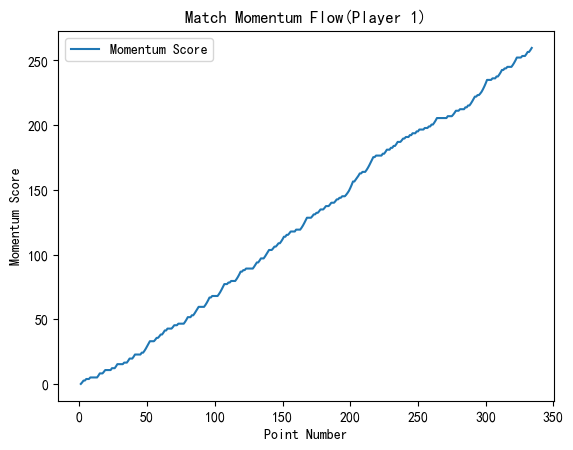

In [5]:
# 可视化势头分数变化
plt.plot(data['point_no'], data['momentum_score_1'], label='Momentum Score')
plt.xlabel('Point Number')
plt.ylabel('Momentum Score')
plt.title('Match Momentum Flow(Player 1)')
plt.legend()
plt.show()
